In [1]:
import sys
import os
import matplotlib.pyplot as plt

In [2]:
from dl_models import NNType, get_nn_model
from image_importer import import_class_imgs

def plot_training_history(hist, name):
    if(hist is not None) :
        fig, (ax1, ax2) = plt.subplots(1,2,figsize = (30,10), dpi=100)
        fig.suptitle(name)
        ax1.set_title('Loss')
        ax1.set_ylabel("Loss (training and validation)")
        ax1.set_xlabel("Training Steps")
        ax1.set_ylim([0,2])
        ax1.plot(hist["loss"], label = "Training set loss")
        ax1.plot(hist["val_loss"], label = "Validation set loss")
        ax1.legend()


        ax2.set_title('Accuracy')
        ax2.set_ylabel("Accuracy (training and validation)")
        ax2.set_xlabel("Training Steps")
        ax2.set_ylim([0,1.1])
        ax2.plot(hist["categorical_accuracy"], label = "Training set accuracy")
        ax2.plot(hist["val_categorical_accuracy"], label = "Validation set loss")
        ax2.legend()


retrain = True

2022-03-13 20:37:59.631696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-13 20:37:59.631719: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
dir_path = sys.path[0]
base_path = f'{dir_path}/data/images/'
models_path = f'{dir_path}/data/models/'


In [5]:
 
classes = os.listdir(base_path)

hists = dict()
for nn_type in list(NNType)[1:]:
    x_train, y_train = import_class_imgs(base_path, classes, nn_type)
    model, hist = get_nn_model(x_train, y_train, nn_type, classes, retrain, models_path)
    hists[nn_type.name] = hist


Found 582 images belonging to 4 classes.


2022-03-13 20:38:03.097217: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 20:38:03.097516: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/abhishek/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-03-13 20:38:03.097891: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/abhishek/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-03-13 20:38:03.098016: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dler

Epoch 1/50


2022-03-13 20:38:04.492891: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1143209984 exceeds 10% of free system memory.
2022-03-13 20:38:04.805429: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1143209984 exceeds 10% of free system memory.
2022-03-13 20:38:06.542502: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 571604992 exceeds 10% of free system memory.
2022-03-13 20:38:07.291533: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 571604992 exceeds 10% of free system memory.


KeyboardInterrupt: 

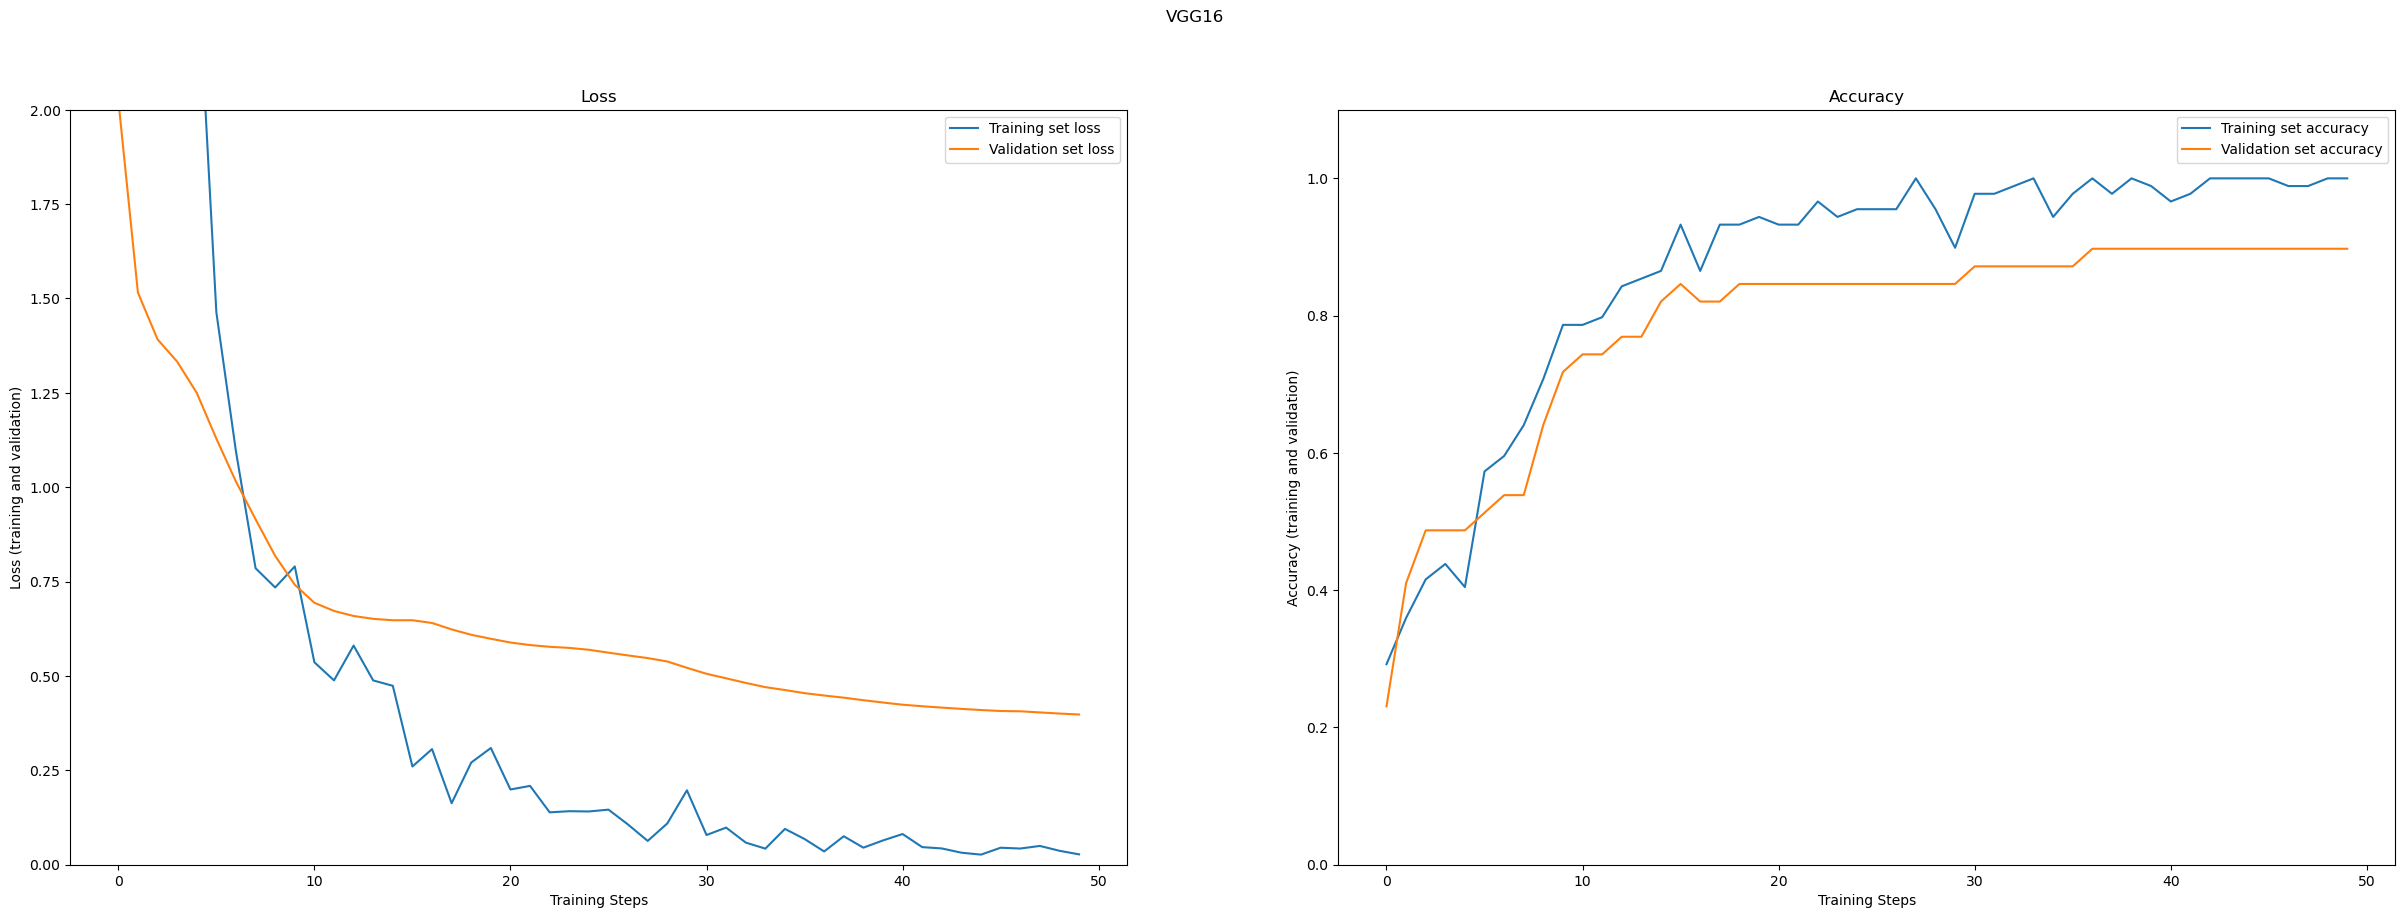

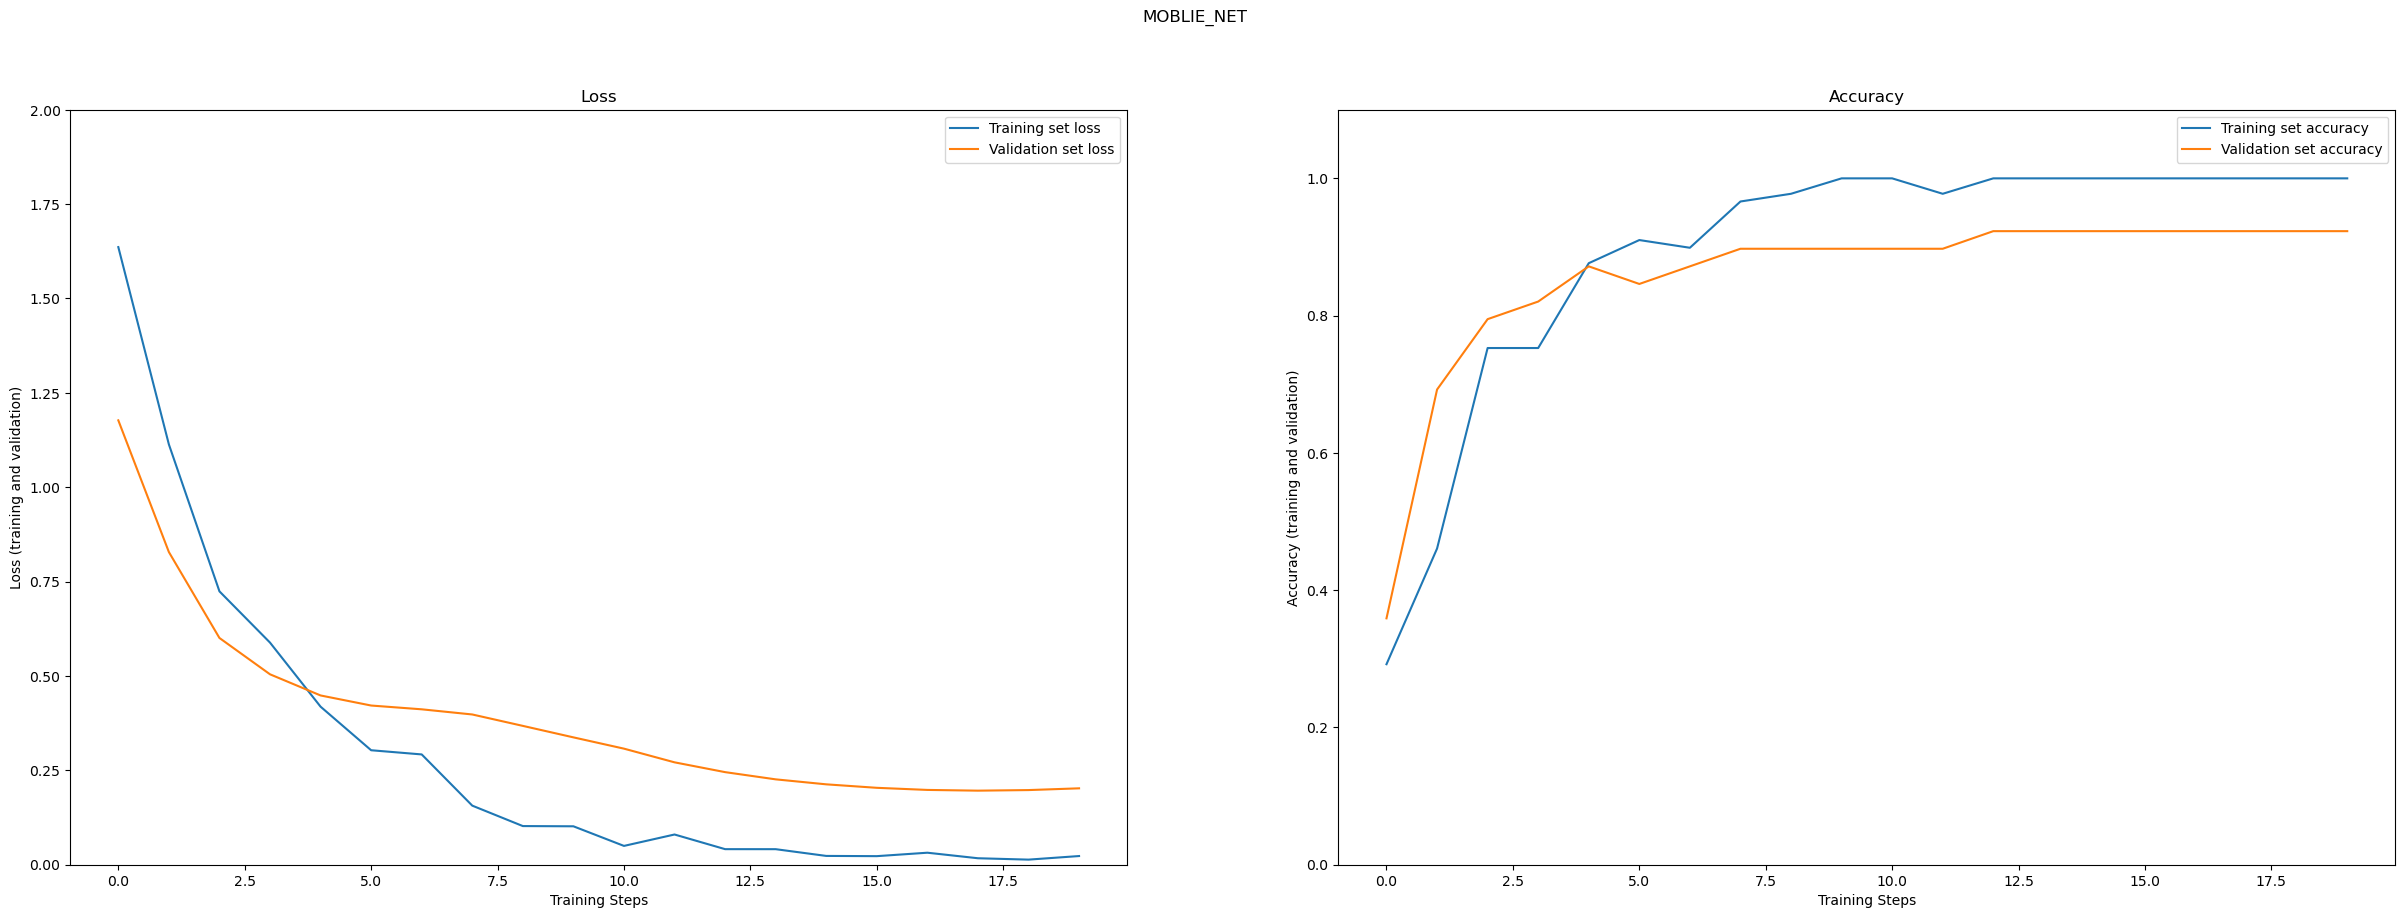

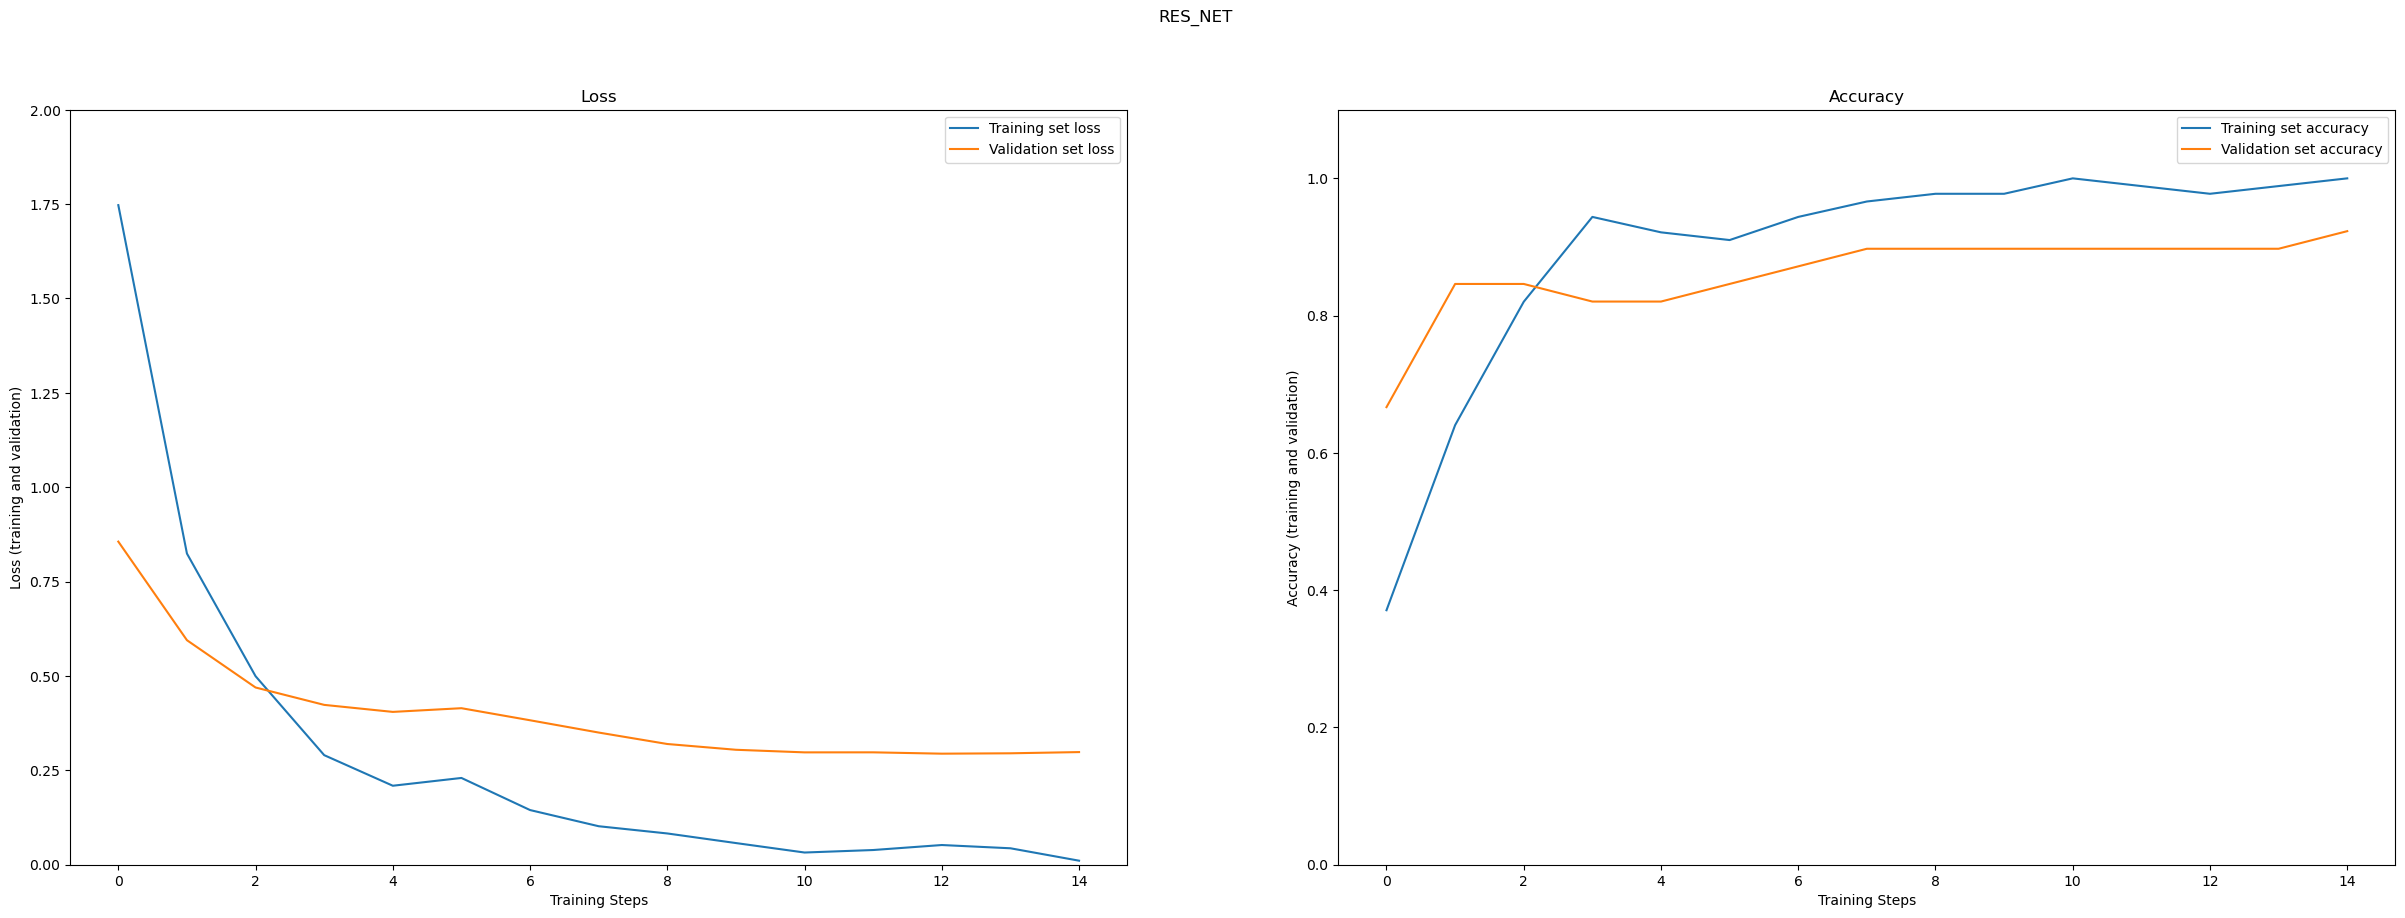

In [ ]:
for hist in hists:
  plot_training_history(hists[hist], hist)
